### Task2 - Finding the Clusters in the Iris Datasets

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### To find the Optimum Num of cluster ,  we use a method called "Elbow Method"

In [2]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
cluster = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = i+1* 30, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cluster.append(kmeans.inertia_)
    

In [3]:
## print the cluster list
cluster

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 30.014398496240602,
 28.036906353450473,
 26.53452922077922]

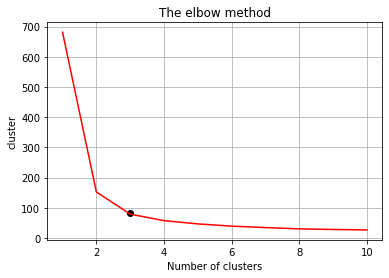

In [28]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), cluster , color = "r")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('cluster') # Within cluster sum of squares
plt.grid()
plt.scatter(3 , 83 , color = "black")

plt.show()

You can clearly see , it is called 'The elbow method' 
The point where the most distortion takes place , is the optimal value of Cluster !

From this we choose the number of clusters as **3**'.

In [7]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

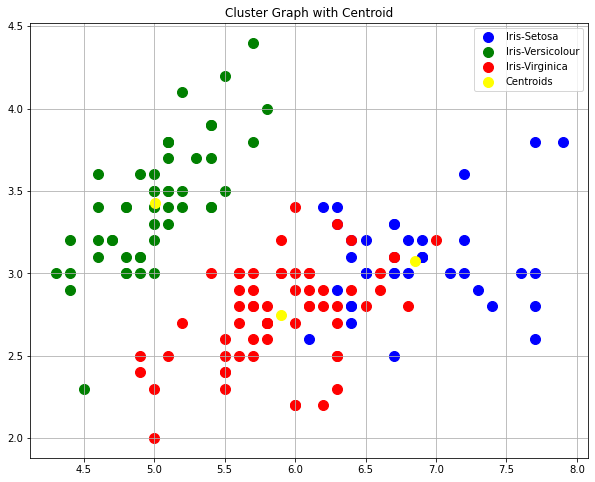

In [16]:
# Visualising the clusters - On the first two columns
plt.figure(figsize  =(10,8))
plt.title("Cluster Graph with Centroid")
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-Versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')


plt.grid()
plt.legend()

In [ ]:
################################################################################################################